A population of people has weights that are normally distributed with mean 70 kg and standard deviation 10 kg.

Tasks:
Randomly select 10 values from this population and compute the sample mean.

Repeat this sampling 10,000 times and plot the distribution (histogram) of the sample means.

Repeat the above steps for sample sizes: 5, 10, 20, 40, 80, 100.

For each sample size, overlay a normal distribution with:

Mean = 70

Standard deviation = 10 / √(sample size)

Compare how the distribution of sample means changes with sample size and how it approaches a normal distribution.

Matplotlib is building the font cache; this may take a moment.


Sample mean for one sample of size n=10: 71.89 kg

Summary Statistics for Sample Means:

Sample Size n=5:
Mean of sample means: 69.98 (Expected: 70)
Std. dev. of sample means: 4.43 (Theoretical: 4.47)

Sample Size n=10:
Mean of sample means: 69.99 (Expected: 70)
Std. dev. of sample means: 3.15 (Theoretical: 3.16)

Sample Size n=20:
Mean of sample means: 69.98 (Expected: 70)
Std. dev. of sample means: 2.24 (Theoretical: 2.24)

Sample Size n=40:
Mean of sample means: 70.00 (Expected: 70)
Std. dev. of sample means: 1.57 (Theoretical: 1.58)

Sample Size n=80:
Mean of sample means: 70.01 (Expected: 70)
Std. dev. of sample means: 1.11 (Theoretical: 1.12)

Sample Size n=100:
Mean of sample means: 70.00 (Expected: 70)
Std. dev. of sample means: 1.01 (Theoretical: 1.00)


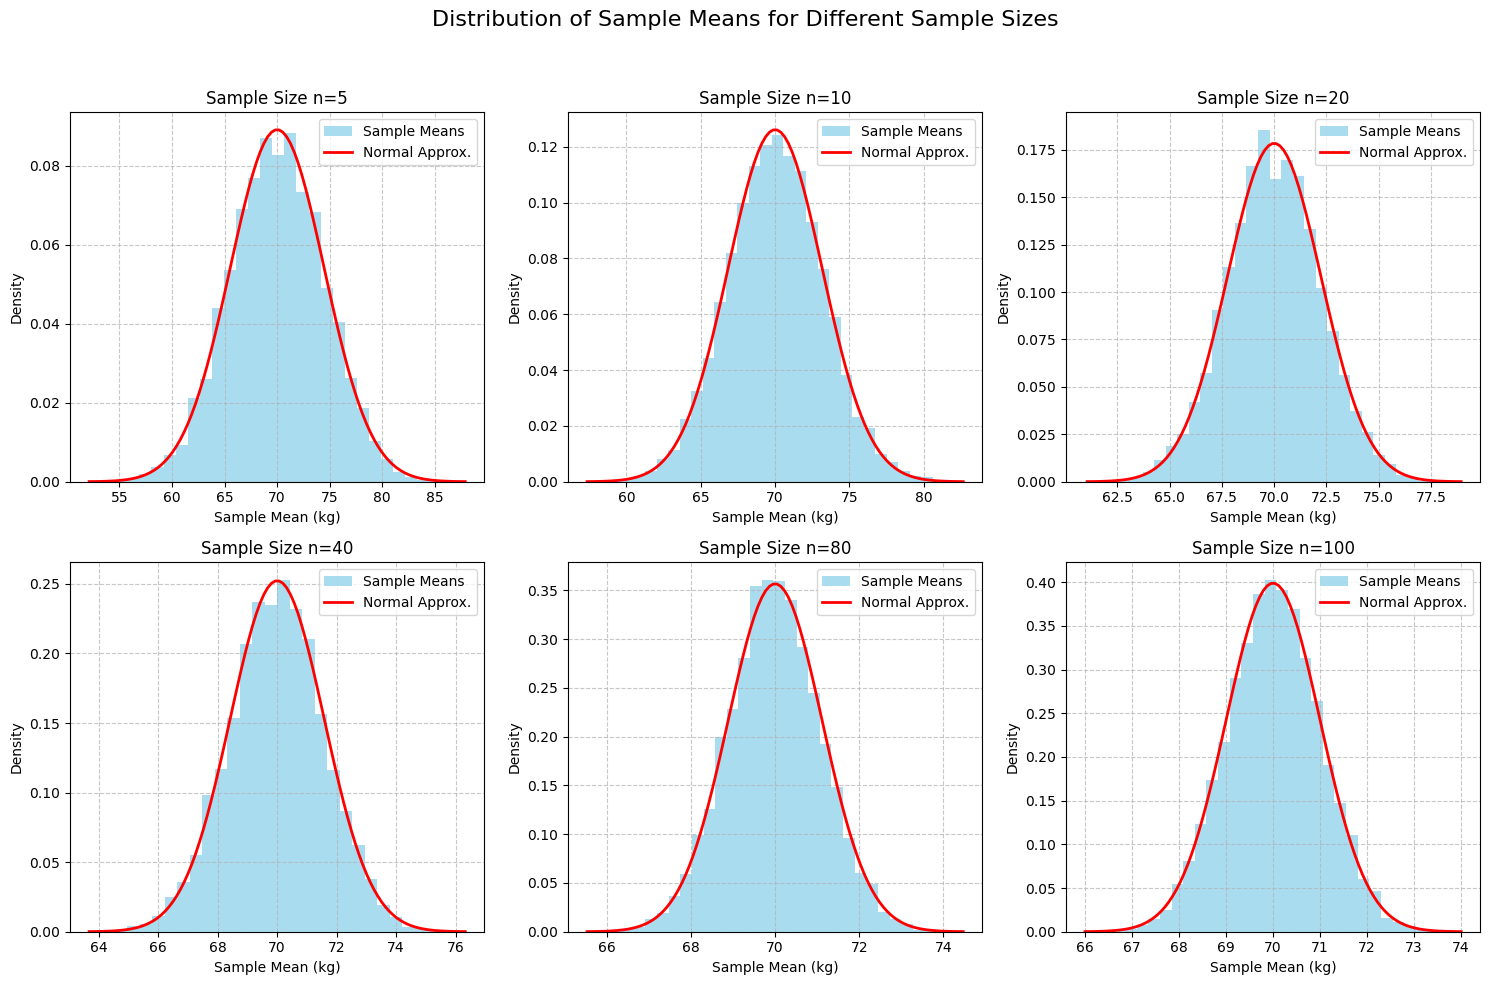

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Population parameters
mu = 70  # Mean weight (kg)
sigma = 10  # Standard deviation (kg)
n_simulations = 10000  # Number of samples
sample_sizes = [5, 10, 20, 40, 80, 100]  # Sample sizes to test

# Create figure for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Simulate and plot for each sample size
for i, n in enumerate(sample_sizes):
    # Simulate n_simulations samples of size n
    sample_means = []
    for _ in range(n_simulations):
        sample = np.random.normal(mu, sigma, n)
        sample_means.append(np.mean(sample))
    
    # Calculate standard error for normal approximation
    std_error = sigma / np.sqrt(n)
    
    # Print sample mean for first sample of n=10 (as requested)
    if n == 10:
        first_sample_mean = np.mean(np.random.normal(mu, sigma, n))
        print(f"Sample mean for one sample of size n=10: {first_sample_mean:.2f} kg")
    
    # Plot histogram of sample means
    axes[i].hist(sample_means, bins=30, density=True, alpha=0.7, color='skyblue', label='Sample Means')
    
    # Overlay normal distribution
    x = np.linspace(mu - 4*std_error, mu + 4*std_error, 100)
    normal_pdf = norm.pdf(x, mu, std_error)
    axes[i].plot(x, normal_pdf, 'r-', linewidth=2, label='Normal Approx.')
    
    # Customize subplot
    axes[i].set_title(f'Sample Size n={n}')
    axes[i].set_xlabel('Sample Mean (kg)')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Print summary statistics
print("\nSummary Statistics for Sample Means:")
for n in sample_sizes:
    sample_means = [np.mean(np.random.normal(mu, sigma, n)) for _ in range(n_simulations)]
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means, ddof=1)
    theoretical_std = sigma / np.sqrt(n)
    print(f"\nSample Size n={n}:")
    print(f"Mean of sample means: {mean_of_means:.2f} (Expected: {mu})")
    print(f"Std. dev. of sample means: {std_of_means:.2f} (Theoretical: {theoretical_std:.2f})")

plt.suptitle('Distribution of Sample Means for Different Sample Sizes', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()